In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from numpy import inf
import numpy as np

In [8]:
# Define the data path (replace with the actual location of your CSV file)
data_path = "../data/raw_analyst_ratings.csv"

try:
  # Read the CSV data into a DataFrame
  data = pd.read_csv(data_path)
  print("Data loaded successfully!")
except FileNotFoundError:
  print("Error: File not found. Please check the data path.")

# Get an overview of the data (data types, missing values)
print(data.info())

Data loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None


In [9]:
# Ensure 'date' is a datetime format (if not already converted)
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Replace infinity values with NaN 
data['date'] = data['date'].replace([inf, -inf], np.nan)

# Forward fill missing dates
data['date'] = data['date'].ffill()

# Check for remaining missing values (should ideally be 0)
print(f"Missing values in 'date' column after forward fill: {data['date'].isnull().sum()}")

Missing values in 'date' column after forward fill: 0


In [10]:
# Exploratory Data Analysis (EDA)

# 1. Descriptive Statistics

# 1.1 Headline Lengths
print("Headline Length Statistics:")
headline_lengths = data['headline'].apply(len)
print(headline_lengths.describe())  # Descriptive statistics for headline lengths

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline, dtype: float64


In [11]:
# 1.2 Articles per Publisher
print("\nArticles per Publisher:")
articles_per_publisher = data['publisher'].value_counts()
print(articles_per_publisher)


Articles per Publisher:
publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


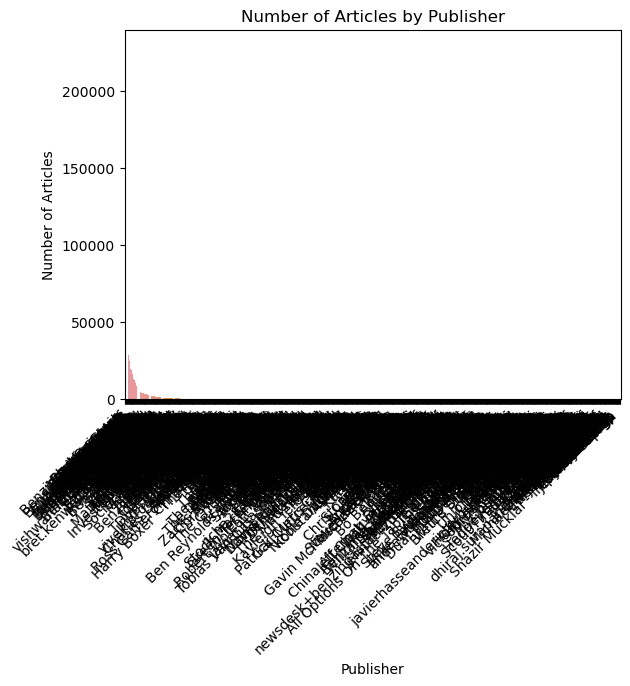

In [12]:
# 2. Data Visualization

# 2.1 Articles by Publisher (Bar Chart)
sns.barplot(x=articles_per_publisher.index, y=articles_per_publisher.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Publisher")
plt.ylabel("Number of Articles")
plt.title("Number of Articles by Publisher")
plt.show()

C:\Users\tewodros\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


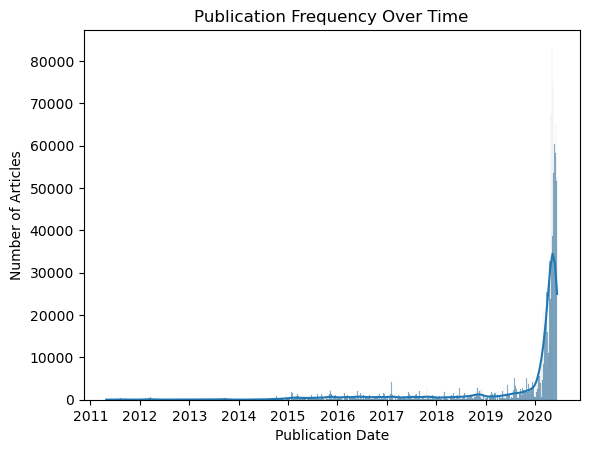

In [13]:
# 2.2 Publication Frequency Over Time (Histogram)
sns.histplot(data['date'], kde=True)
plt.xlabel("Publication Date")
plt.ylabel("Number of Articles")
plt.title("Publication Frequency Over Time")
plt.show()

In [14]:
# 3. Text Analysis (Sentiment Analysis)

def get_sentiment(text):
  analysis = TextBlob(text)
  sentiment = analysis.sentiment.polarity

  # Explain sentiment score range (-1 to 1)
  if sentiment < 0:
    return "Negative"
  elif sentiment == 0:
    return "Neutral"
  else:
    return "Positive"

data['sentiment'] = data['headline'].apply(get_sentiment)

C:\Users\tewodros\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


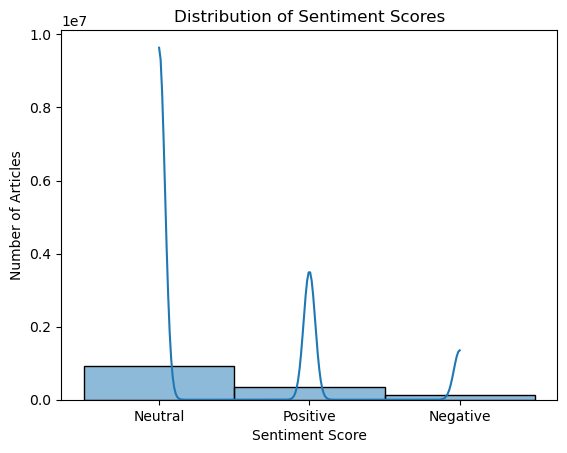

In [15]:
# 3.1 Sentiment Score Distribution (Histogram)
sns.histplot(data['sentiment'], kde=True)
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Articles")
plt.title("Distribution of Sentiment Scores")
plt.show()

In [16]:
# 4. Publisher Analysis

# 4.1 Articles per Publisher (revisit after potential filtering)
print("\nArticles per Publisher (after potential filtering):")
articles_per_publisher = data['publisher'].value_counts()
print(articles_per_publisher)


Articles per Publisher (after potential filtering):
publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


In [17]:
# 4.2 Identify Unique Domains from Publisher Names (if applicable)
if '@' in data['publisher'].unique():
  unique_domains = data['publisher'].apply(lambda x: x.split('@')[-1] if '@' in x else x).unique()
  print("\nUnique Domains from Publisher Names:")
  print(unique_domains)

In [18]:
# 5. Time Series Analysis

# 5.1 Publication Frequency by Hour/Day
data['hour'] = data['date'].dt.hour
data['day_of_week'] = data['date'].dt.weekdayname()

# Plot publication frequency by hour
sns.histplot(data['hour'], bins=24, kde=True)  # Adjust bins for finer granularity
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Articles")
plt.title("Publication Frequency by Hour")

AttributeError: 'DatetimeProperties' object has no attribute 'weekdayname'